In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


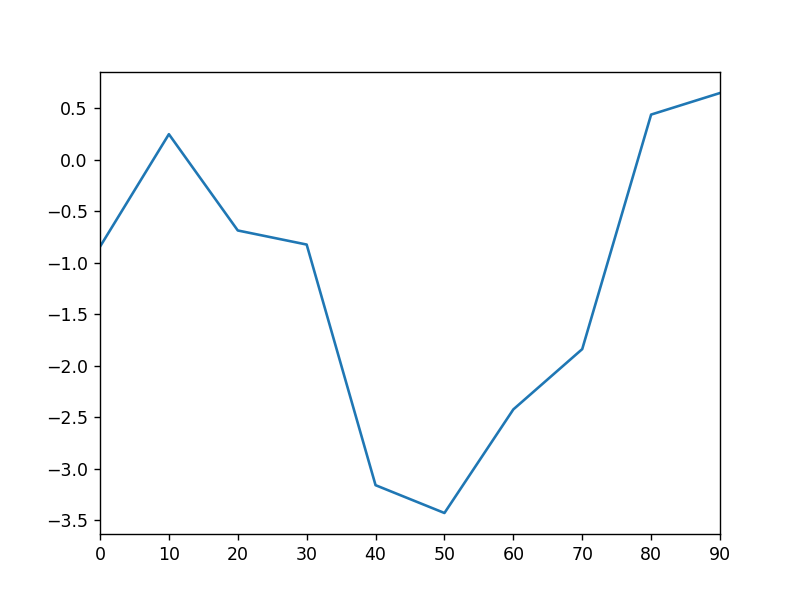

In [4]:
s.plot()

In [5]:
plt.close()

In [6]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns = ['A', 'B', 'C', 'D'], index = np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


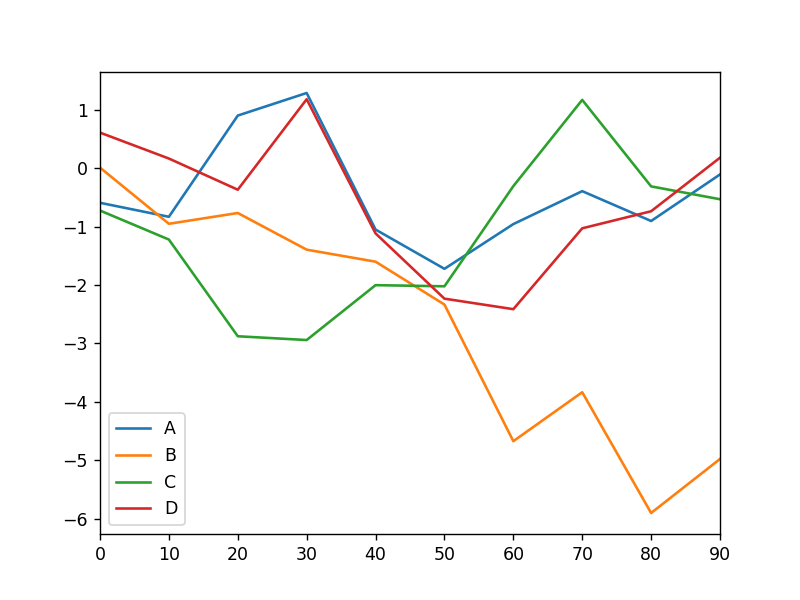

In [7]:
df.plot()

In [8]:
plt.close()

## Bar plots

<IPython.core.display.Javascript object>


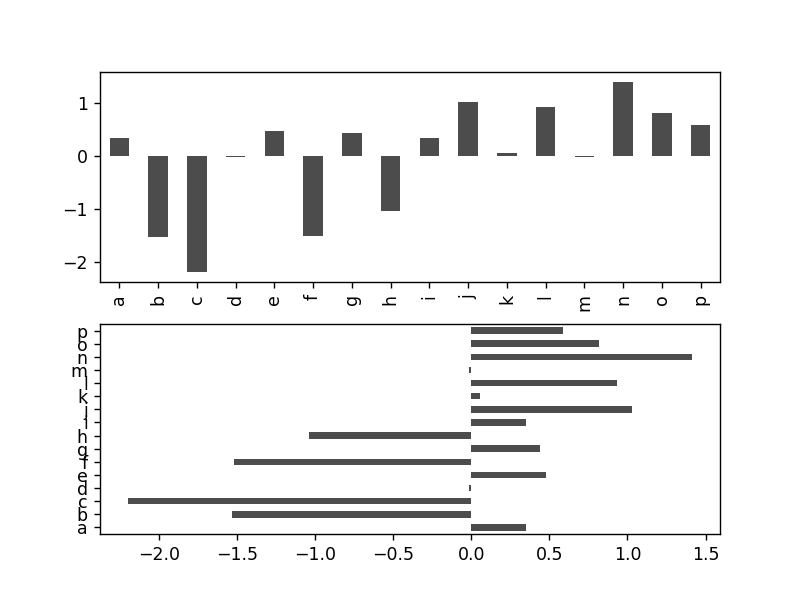

In [9]:
fig, axis = plt.subplots(2, 1)

In [10]:
data = pd.Series(np.random.randn(16), index = list('abcdefghijklmnop'))

##### drawing on the axis[0] in black and partial transparency(alpha)

In [11]:
data.plot.bar(ax = axis[0], color = 'k', alpha = 0.7)

In [12]:
data.plot.barh(ax = axis[1], color = 'k', alpha = 0.7)

In [13]:
plt.close()

In [14]:
df = pd.DataFrame(np.random.randn(6, 4), index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'], name = 'Genus'))
df

Genus,A,B,C,D
one,0.416240,-1.153136,-0.005128,-0.531697
two,-0.861254,-0.823097,0.136301,-1.747717
three,-1.476710,-0.185281,-1.974223,-0.209168
four,-1.860755,0.311618,-1.446621,0.626061
five,0.068525,0.053548,-1.054057,-0.124470
six,0.032451,-0.891077,-1.081372,0.682085


<IPython.core.display.Javascript object>


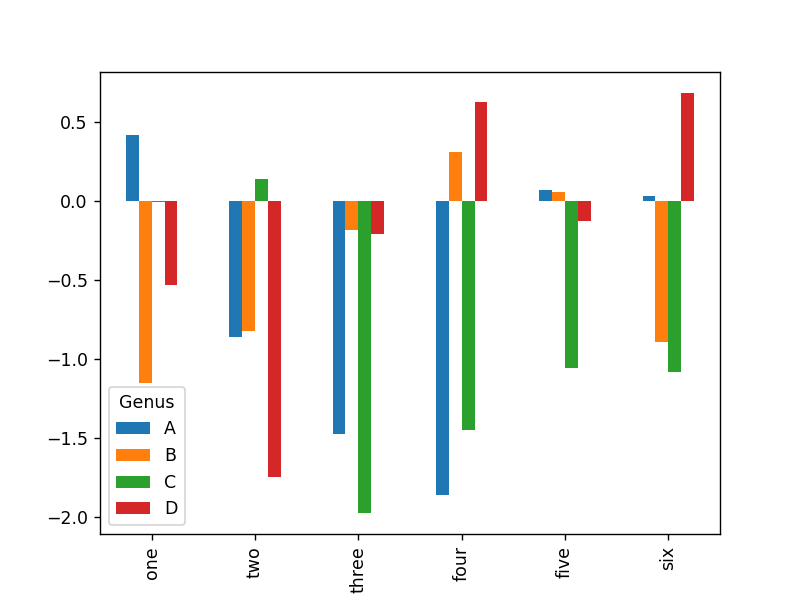

In [15]:
df.plot.bar()

In [16]:
plt.close()

<IPython.core.display.Javascript object>


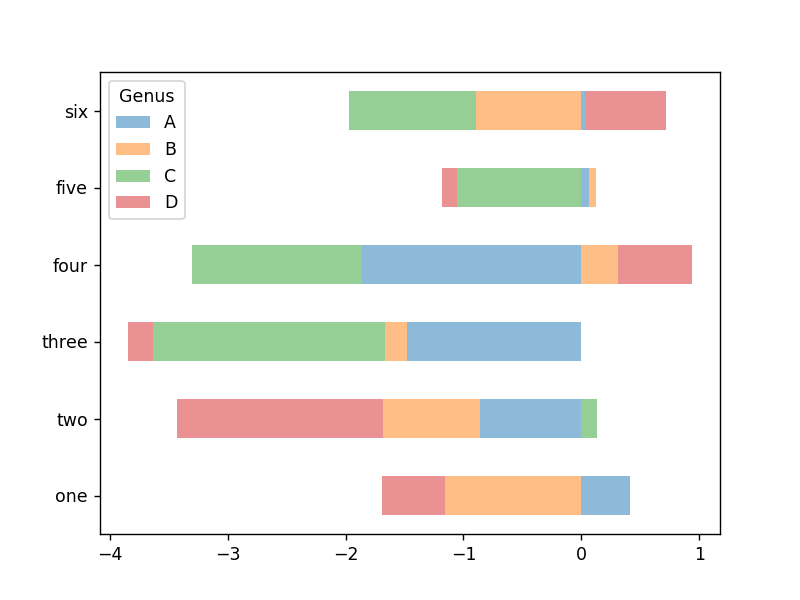

In [17]:
df.plot.barh(stacked = True, alpha = 0.5)

In [18]:
plt.close()

In [19]:
tips = pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')

In [20]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [21]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [22]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [23]:
party_counts = party_counts.loc[:, 2:5]

In [24]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [25]:
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


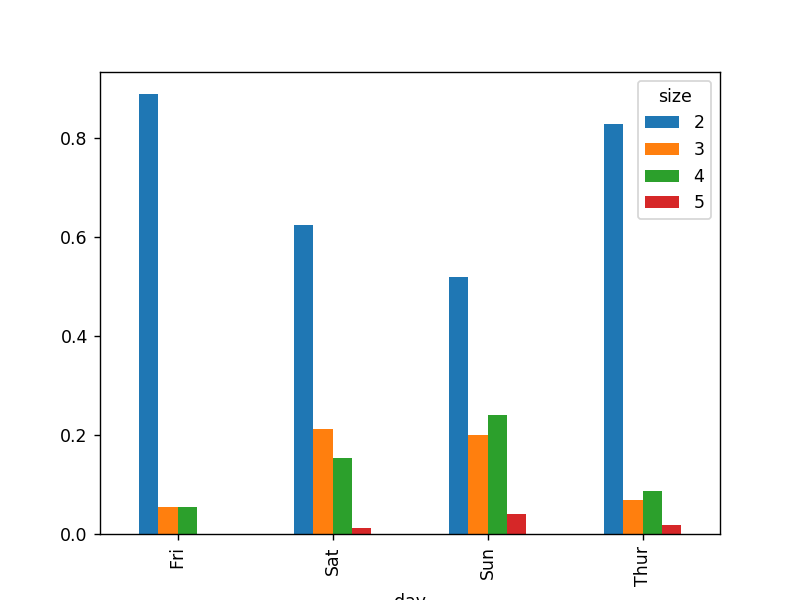

In [26]:
party_pcts.plot.bar()

In [27]:
plt.close()

In [28]:
import seaborn as sns

In [29]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [30]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


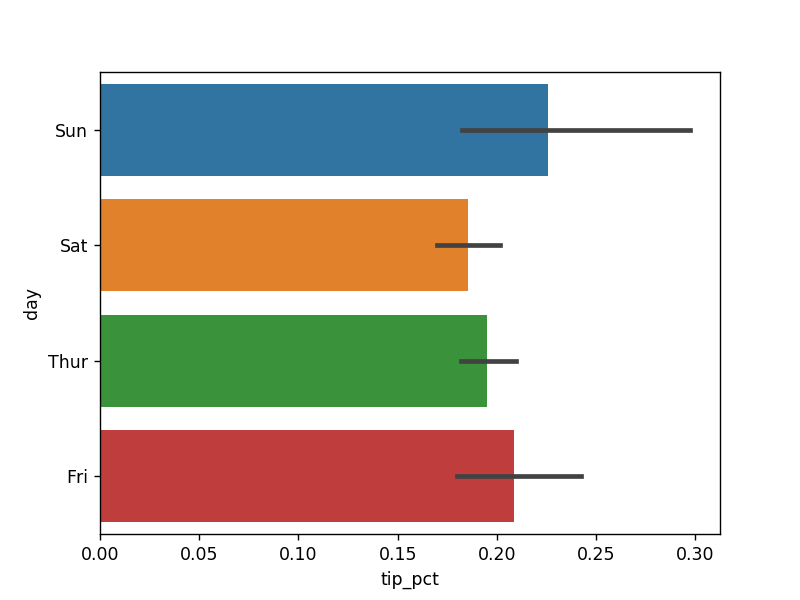

In [31]:
sns.barplot(x = 'tip_pct', y = 'day', data = tips, orient = 'h')

In [32]:
plt.close()

<IPython.core.display.Javascript object>


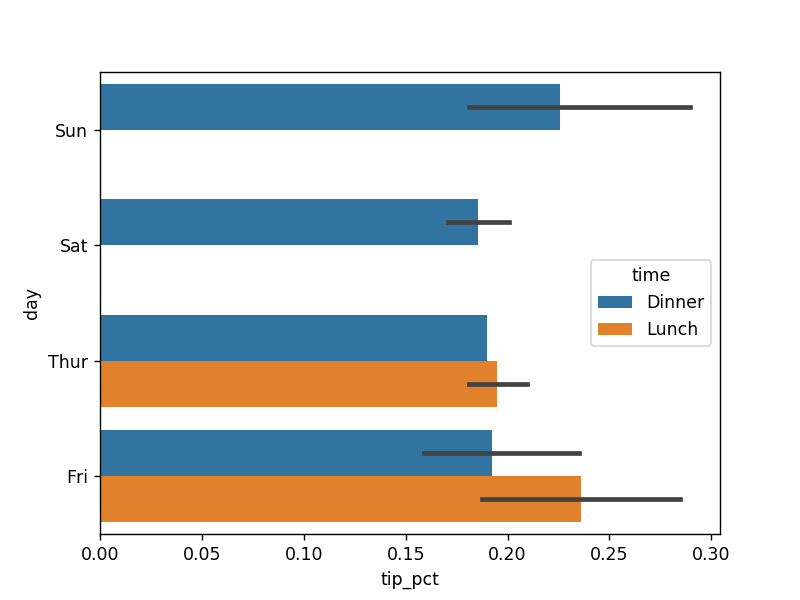

In [33]:
sns.barplot(x = 'tip_pct', y = 'day', hue = 'time', data = tips, orient = 'h')

In [35]:
plt.close()

### Histogram and density plots

<IPython.core.display.Javascript object>


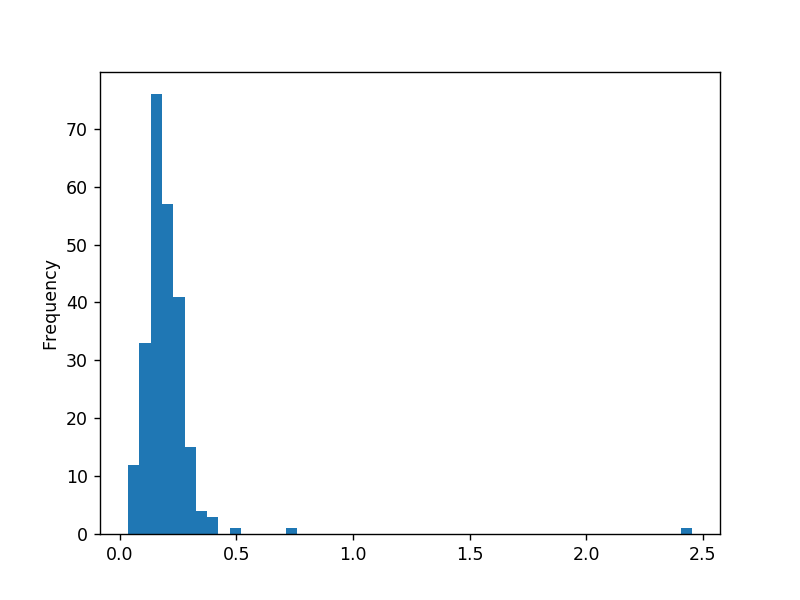

In [36]:
tips['tip_pct'].plot.hist(bins = 50)

In [37]:
plt.close()

<IPython.core.display.Javascript object>


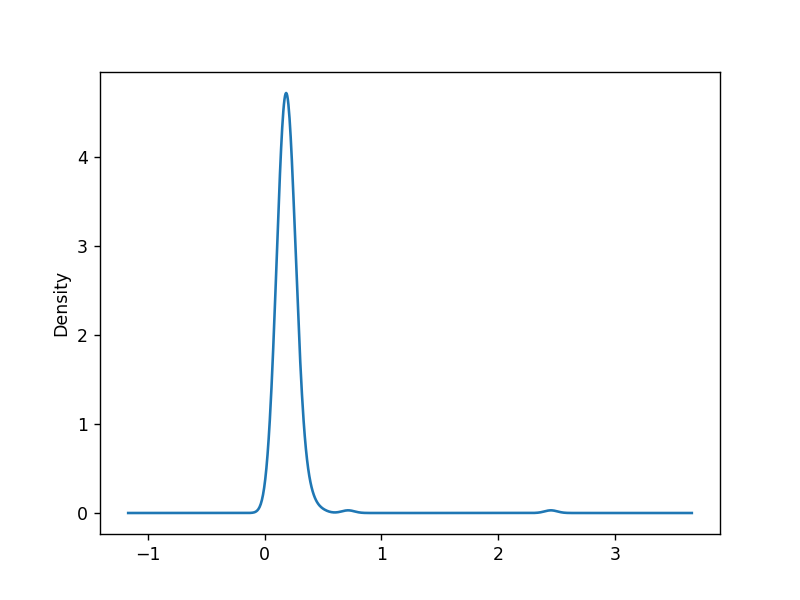

In [38]:
tips['tip_pct'].plot.density()

In [39]:
plt.close()

In [41]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

In [42]:
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


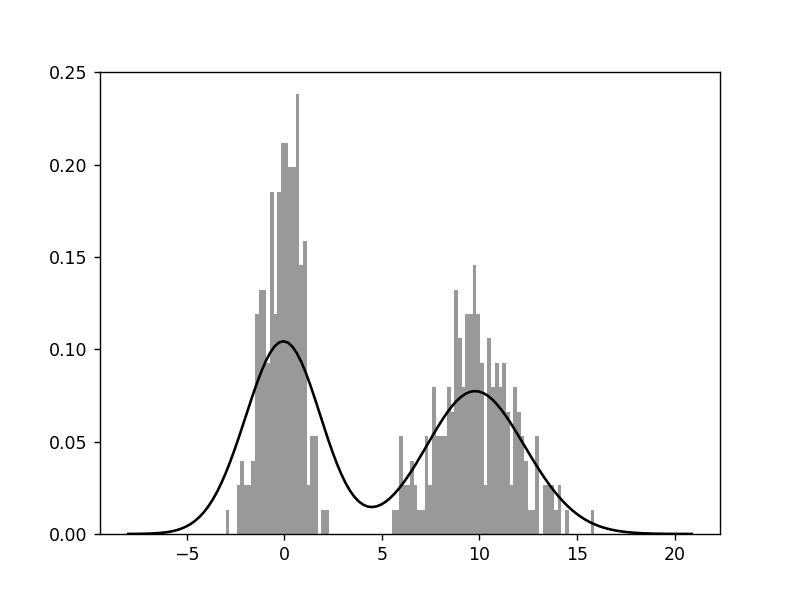

In [43]:
sns.distplot(values, bins=100, color='k')

In [44]:
plt.close()

### scatter or point plots

In [45]:
macro = pd.read_csv('pydata-book-2nd-edition/examples/macrodata.csv')

In [46]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [47]:
trans_data = np.log(data).diff().dropna()

In [48]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


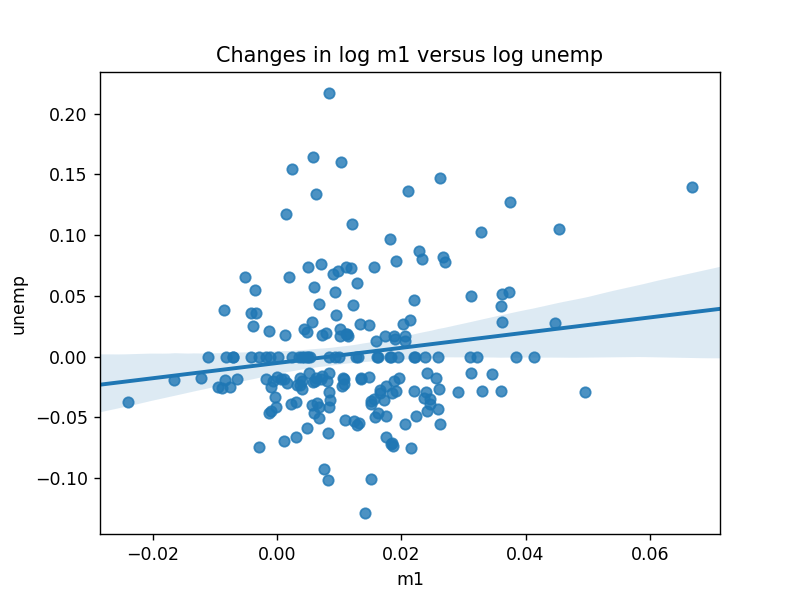

In [49]:
sns.regplot('m1', 'unemp', data=trans_data)

In [50]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [51]:
plt.close()

<IPython.core.display.Javascript object>


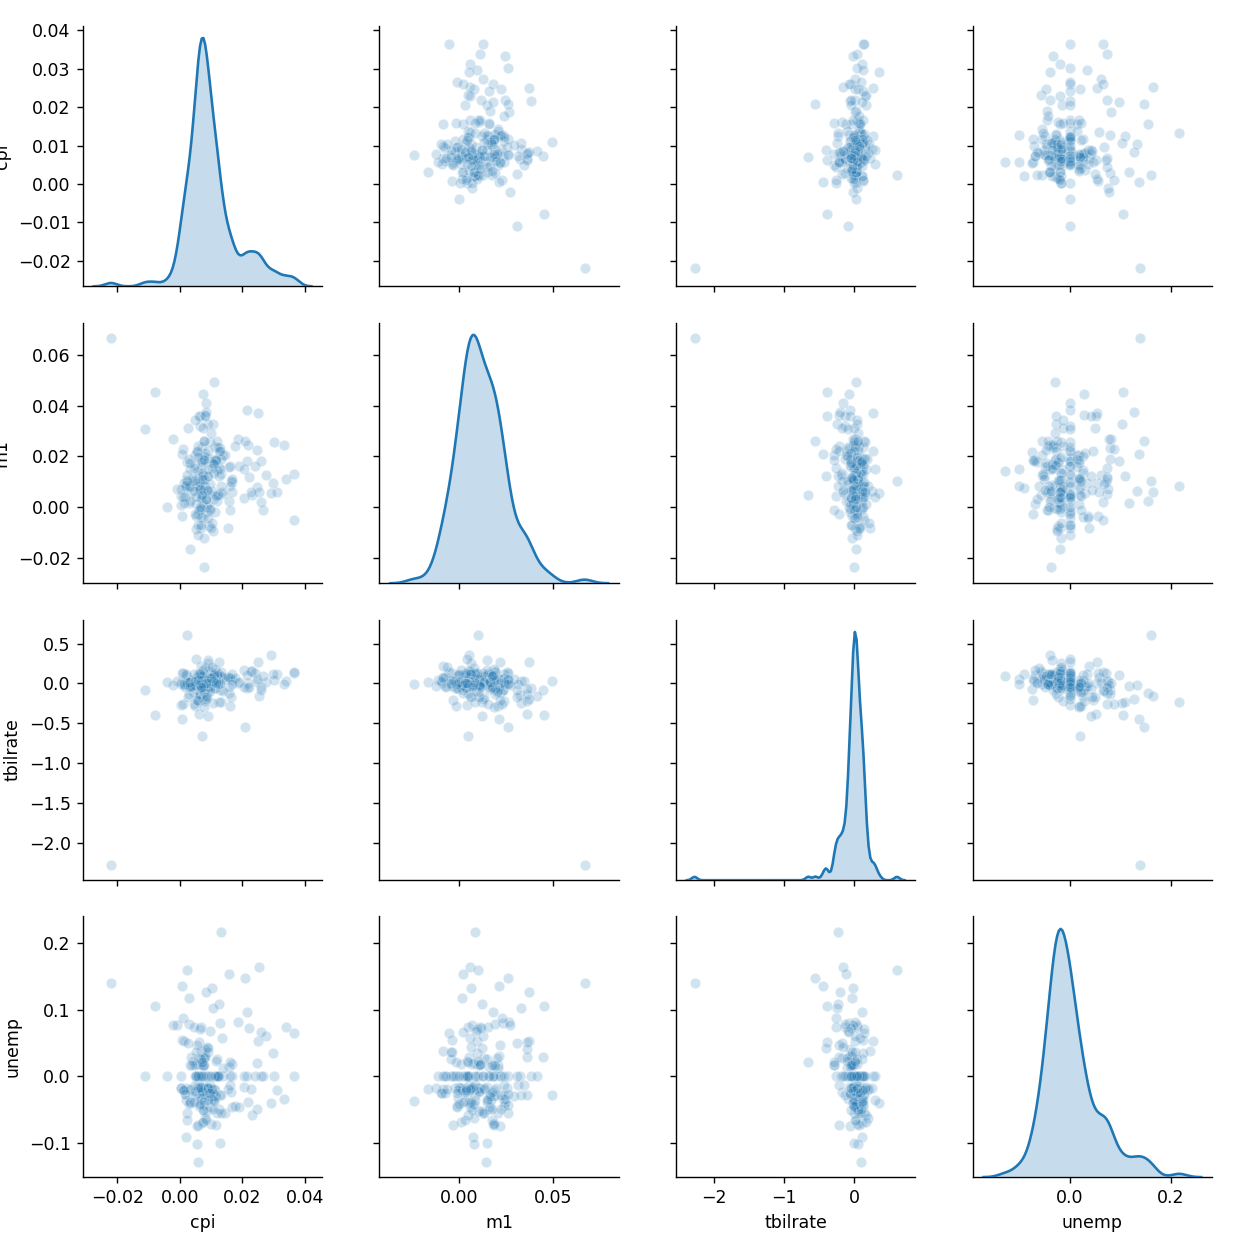

In [52]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

In [53]:
plt.close()

## Face grid and categorical data

<IPython.core.display.Javascript object>


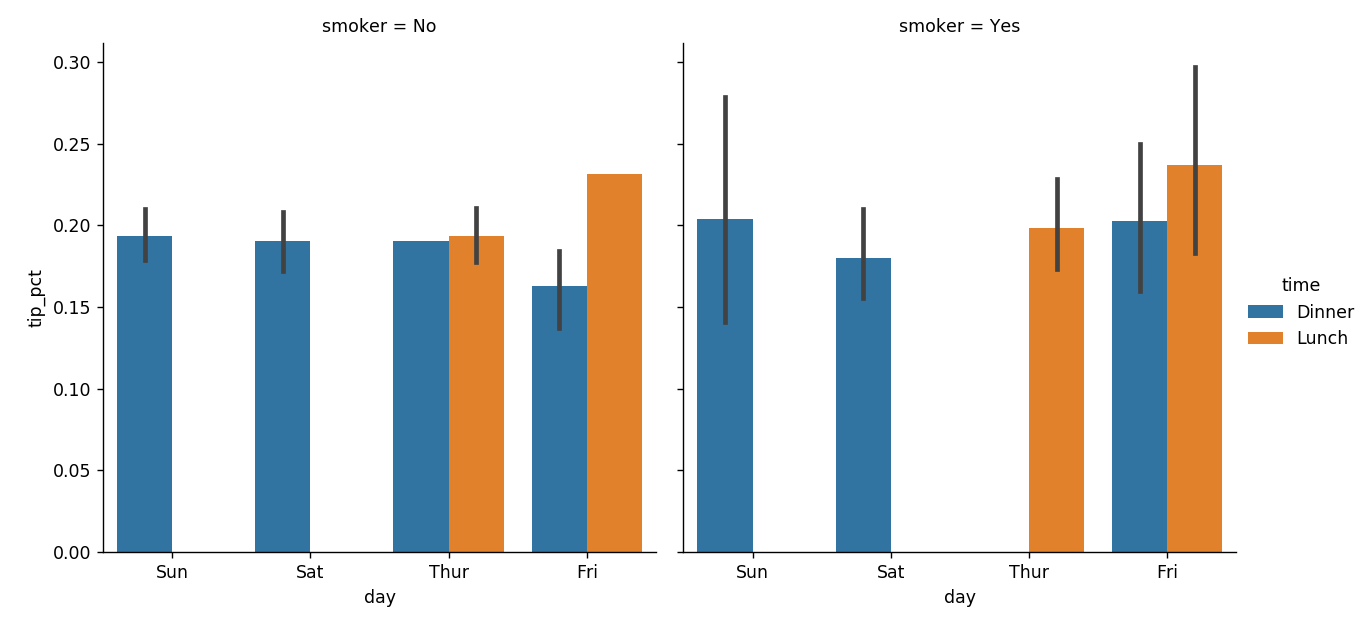

In [55]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

In [56]:
plt.close()

<IPython.core.display.Javascript object>


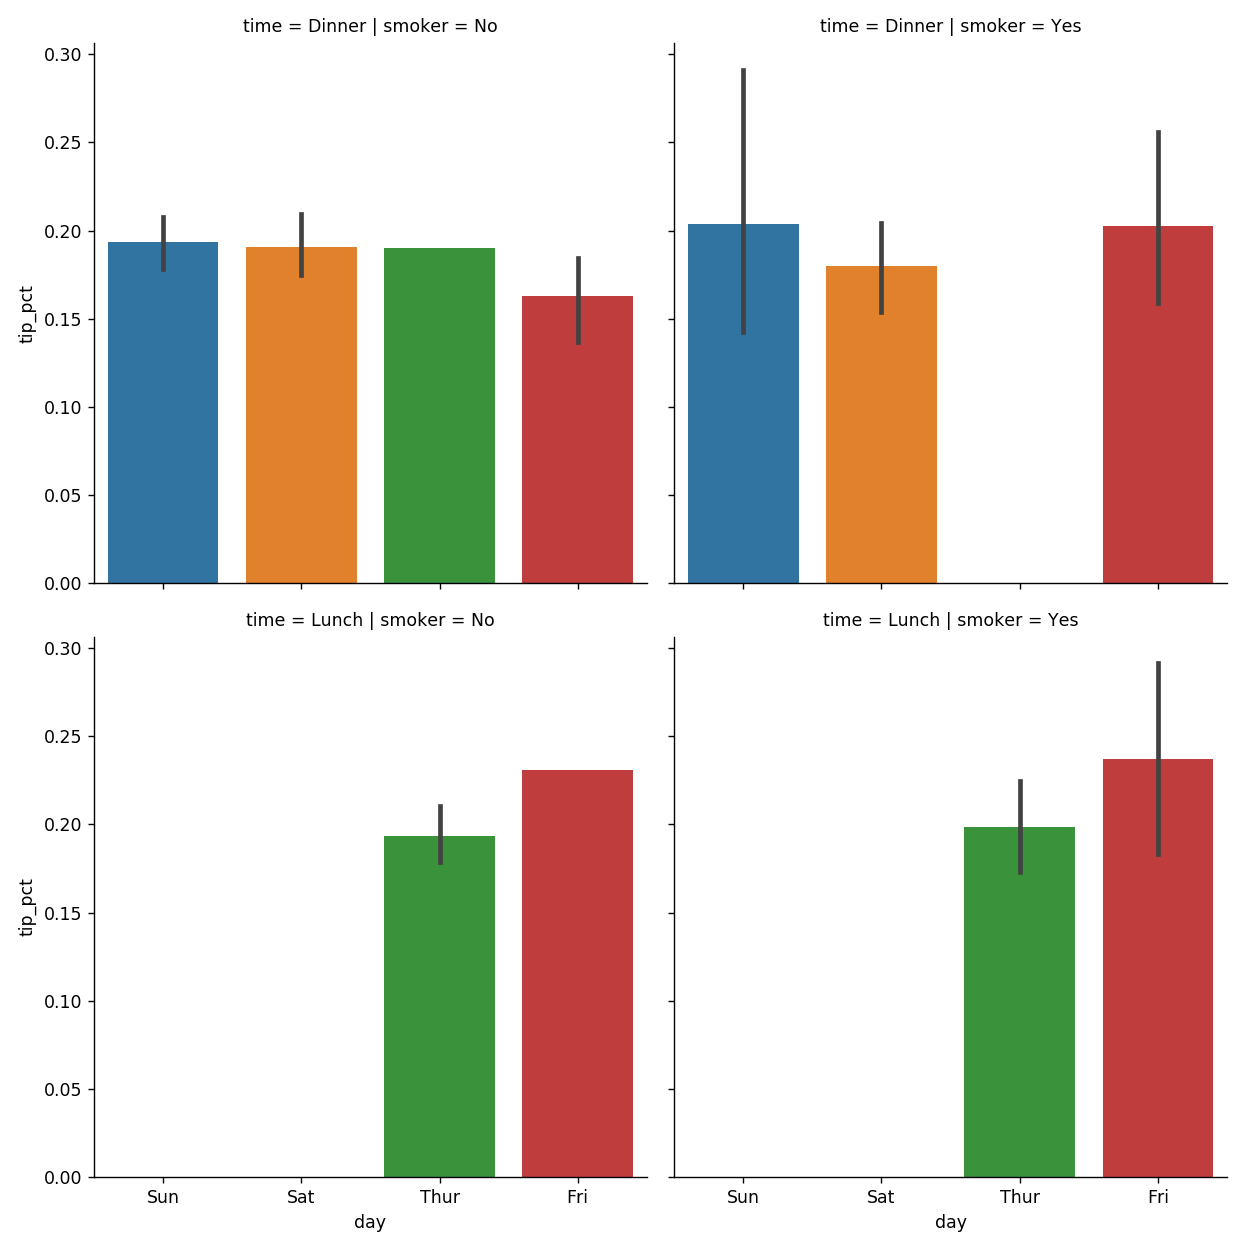

In [58]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

In [59]:
plt.close()

##### box plot option

<IPython.core.display.Javascript object>


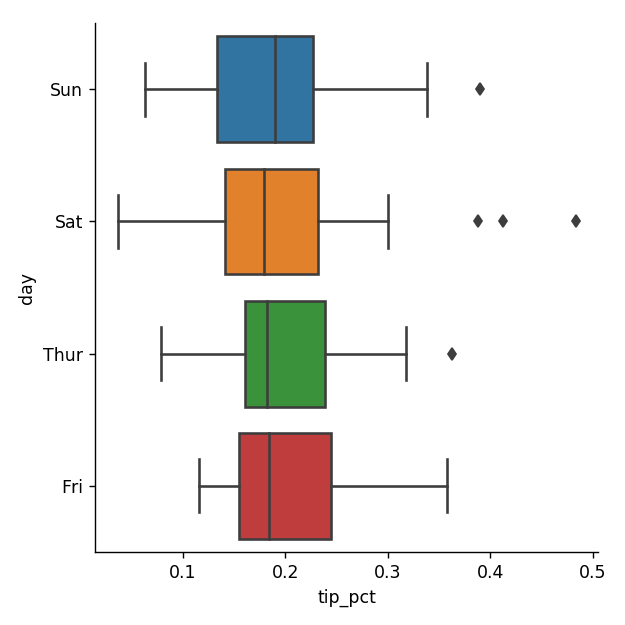

In [60]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

In [61]:
plt.close()